In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read Phoenix Park data
df1 = pd.read_csv('master_pp.csv')
df2 = pd.read_csv('master_pp_2.csv')

In [3]:
#join the two dataframes
df = pd.concat([df1, df2])

In [4]:
df.head()

,year,month,day,hour,minute,maxdry,maxhum,maxbaro,date,sferics_10,sferics_20,sferics_30
0,2005,1,1,0,0,8.6,85.0,1015.3,20051100,0,0,0
1,2005,1,1,0,10,8.5,88.9,1015.3,200511010,0,0,0
2,2005,1,1,0,20,8.2,89.1,1015.1,200511020,0,0,0
3,2005,1,1,0,30,8.2,88.5,1014.9,200511030,0,0,0
4,2005,1,1,0,40,8.3,86.8,1014.8,200511040,0,0,0


In [5]:
df.tail()

,year,month,day,hour,minute,maxdry,maxhum,maxbaro,date,sferics_10,sferics_20,sferics_30
473323,2023,12,31,23,10,6.2,83.8,987.9,202312312310,0,0,0
473324,2023,12,31,23,20,6.2,84.1,988.3,202312312320,0,0,0
473325,2023,12,31,23,30,6.2,84.5,988.6,202312312330,0,0,0
473326,2023,12,31,23,40,6.1,85.4,988.8,202312312340,0,0,0
473327,2023,12,31,23,50,6.0,85.9,989.0,202312312350,0,0,0


In [6]:
#both dataframes have been loaded into one dataframe
#count the number of rows
len(df)

999216

In [7]:
#reste the index
df = df.reset_index(drop=True)

In [8]:
df.tail()

,year,month,day,hour,minute,maxdry,maxhum,maxbaro,date,sferics_10,sferics_20,sferics_30
999211,2023,12,31,23,10,6.2,83.8,987.9,202312312310,0,0,0
999212,2023,12,31,23,20,6.2,84.1,988.3,202312312320,0,0,0
999213,2023,12,31,23,30,6.2,84.5,988.6,202312312330,0,0,0
999214,2023,12,31,23,40,6.1,85.4,988.8,202312312340,0,0,0
999215,2023,12,31,23,50,6.0,85.9,989.0,202312312350,0,0,0


In [29]:
#check for missing values
df.isnull().sum()

year          0
month         0
day           0
hour          0
minute        0
maxdry        0
maxhum        0
maxbaro       0
date          0
sferics_10    0
sferics_20    0
sferics_30    0
dtype: int64

In [30]:
#check for outliers
df.describe()

,year,month,day,hour,minute,maxdry,maxhum,maxbaro,date,sferics_10,sferics_20,sferics_30
count,998402.000000,998402.00000,998402.000000,998402.000000,998402.000000,998402.000000,998402.000000,998402.000000,9.984020e+05,998402.000000,998402.000000,998402.000000
mean,2014.006421,6.52399,15.728754,11.499844,24.999770,10.366890,82.569413,1007.710403,2.571558e+10,0.002907,0.002578,0.002528
std,5.473912,3.44953,8.802336,6.922374,17.078238,5.262592,12.121115,12.371648,5.479998e+10,0.053835,0.050710,0.050216
min,2005.000000,1.00000,1.000000,0.000000,0.000000,-10.700000,24.000000,948.900000,2.005110e+07,0.000000,0.000000,0.000000
25%,2009.000000,4.00000,8.000000,5.000000,10.000000,6.600000,74.800000,1000.100000,2.009621e+09,0.000000,0.000000,0.000000
50%,2014.000000,7.00000,16.000000,11.000000,20.000000,10.400000,84.700000,1008.900000,2.021911e+09,0.000000,0.000000,0.000000
75%,2019.000000,10.00000,23.000000,18.000000,40.000000,14.100000,92.500000,1016.300000,2.015516e+10,0.000000,0.000000,0.000000
max,2023.000000,12.00000,31.000000,23.000000,50.000000,33.000000,100.000000,1042.100000,2.023123e+11,1.000000,1.000000,1.000000


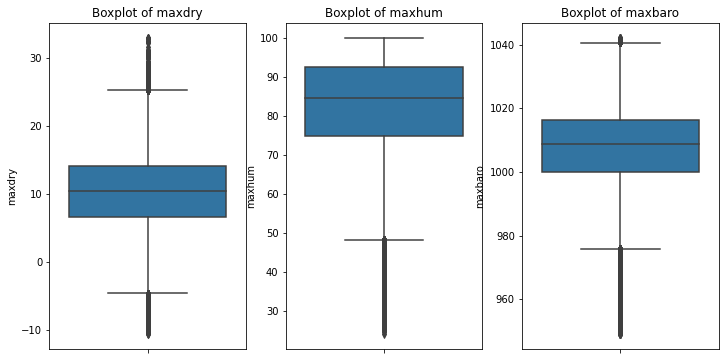

In [31]:
#boxplots of maxdry, maxhum, maxbaro
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['maxdry'])
plt.title('Boxplot of maxdry')
plt.subplot(1, 3, 2)
sns.boxplot(y=df['maxhum'])
plt.title('Boxplot of maxhum')
plt.subplot(1, 3, 3)
sns.boxplot(y=df['maxbaro'])
plt.title('Boxplot of maxbaro')
plt.show()

Precision:  0.5
Recall:  0.00505902192242833


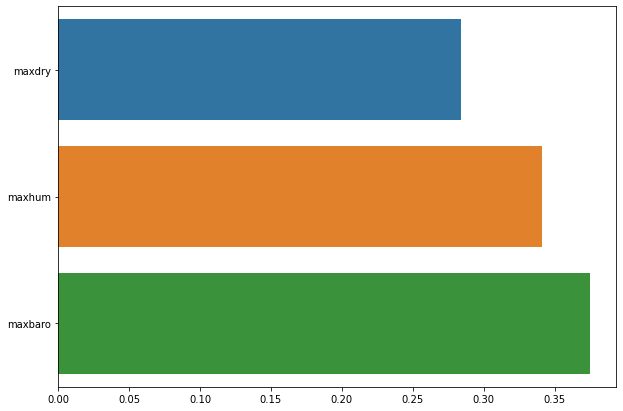

In [9]:
#XGBoost modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

#split the data into training and test sets
#drop Nan values 
df = df.dropna()
X = df.drop(['date', 'year', 'month', 'day', 'hour', 'minute', 'sferics_10', 'sferics_20', 'sferics_30'], axis=1)
y = df['sferics_10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#instantiate the model
model = XGBRegressor()

#fit the model
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)
#if y_pred>0.5, then y_pred=1, else y_pred=0
y_pred = np.where(y_pred > 0.5, 1, 0)

#calculate the f-score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
tn = np.sum(np.logical_and(y_pred == 0, y_test == 0))
fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Precision: ', precision)
print('Recall: ', recall)

#plot the feature importances
plt.figure(figsize=(10, 7))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.show()



In [10]:
#oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)


In [11]:
#size of df
len(df)

998402

In [12]:
X = df.drop(['date', 'year', 'month', 'day', 'hour', 'minute', 'sferics_10', 'sferics_20', 'sferics_30'], axis=1)
y = df['sferics_10']

In [13]:
#oversampling test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
#instantiate the model
model = XGBRegressor()

#fit the model
model.fit(X_smote, y_smote)

#make predictions
y_pred = model.predict(X_test)
#if y_pred>0.1, then y_pred=1, else y_pred=0
y_pred = np.where(y_pred > 0.5, 1, 0)

#calculate the f-score
from sklearn.metrics import f1_score
print('F1 Score: ', f1_score(y_test, y_pred))


tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
tn = np.sum(np.logical_and(y_pred == 0, y_test == 0))
fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))
print('True Positives: ', tp)
print('False Positives: ', fp)
print('True Negatives: ', tn)
print('False Negatives: ', fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Precision: ', precision)
print('Recall: ', recall)


F1 Score:  0.02355846869953453
True Positives:  124
False Positives:  9810
True Negatives:  189278
False Negatives:  469
Precision:  0.012482383732635393
Recall:  0.209106239460371


In [14]:
#undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=123)

X = df.drop(['date', 'year', 'month', 'day', 'hour', 'minute', 'sferics_10', 'sferics_20', 'sferics_30'], axis=1)
y = df['sferics_10']

X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [15]:
#oversampling test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
#instantiate the model
model = XGBRegressor()

#fit the model
model.fit(X_rus, y_rus)

#make predictions
y_pred = model.predict(X_test)
#if y_pred>0.1, then y_pred=1, else y_pred=0
y_pred = np.where(y_pred > 0.5, 1, 0)

#calculate the f-score
from sklearn.metrics import f1_score
print('F1 Score: ', f1_score(y_test, y_pred))


tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
tn = np.sum(np.logical_and(y_pred == 0, y_test == 0))
fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))
print('True Positives: ', tp)
print('False Positives: ', fp)
print('True Negatives: ', tn)
print('False Negatives: ', fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Precision: ', precision)
print('Recall: ', recall)

F1 Score:  0.011464767336877856
True Positives:  400
False Positives:  68786
True Negatives:  130302
False Negatives:  193
Precision:  0.005781516491775792
Recall:  0.6745362563237775


In [16]:
#oversample and oversample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_rus, y_rus = rus.fit_resample(X_smote, y_smote)
#instantiate the model
model = XGBRegressor()

#fit the model
model.fit(X_rus, y_rus)

#make predictions
y_pred = model.predict(X_test)
#if y_pred>0.6, then y_pred=1, else y_pred=0
y_pred = np.where(y_pred > 0.6, 1, 0)

#calculate the f-score
from sklearn.metrics import f1_score
print('F1 Score: ', f1_score(y_test, y_pred))


tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
tn = np.sum(np.logical_and(y_pred == 0, y_test == 0))
fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))
print('True Positives: ', tp)
print('False Positives: ', fp)
print('True Negatives: ', tn)
print('False Negatives: ', fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Precision: ', precision)
print('Recall: ', recall)

F1 Score:  0.03104901308494123
True Positives:  70
False Positives:  3846
True Negatives:  195242
False Negatives:  523
Precision:  0.01787538304392237
Recall:  0.11804384485666104


In [17]:
#if y_pred>0.1, then y_pred=1, else y_pred=0
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.6, 1, 0)

#calculate the f-score
from sklearn.metrics import f1_score
print('F1 Score: ', f1_score(y_test, y_pred))


tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
tn = np.sum(np.logical_and(y_pred == 0, y_test == 0))
fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))
print('True Positives: ', tp)
print('False Positives: ', fp)
print('True Negatives: ', tn)
print('False Negatives: ', fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Precision: ', precision)
print('Recall: ', recall)

F1 Score:  0.03104901308494123
True Positives:  70
False Positives:  3846
True Negatives:  195242
False Negatives:  523
Precision:  0.01787538304392237
Recall:  0.11804384485666104


In [18]:
#20minute
X = df.drop(['date', 'year', 'month', 'day', 'hour', 'minute', 'sferics_10', 'sferics_20', 'sferics_30'], axis=1)
y = df['sferics_20']

In [19]:
#oversample and oversample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, y_train = smote.fit_resample(X_train, y_train)
#X_train, y_train = rus.fit_resample(X_train, y_train)
#instantiate the model
model = XGBRegressor()

#fit the model
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)
#if y_pred>0.6, then y_pred=1, else y_pred=0
y_pred = np.where(y_pred > 0.6, 1, 0)

#calculate the f-score
from sklearn.metrics import f1_score
print('F1 Score: ', f1_score(y_test, y_pred))


tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
tn = np.sum(np.logical_and(y_pred == 0, y_test == 0))
fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))
print('True Positives: ', tp)
print('False Positives: ', fp)
print('True Negatives: ', tn)
print('False Negatives: ', fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Precision: ', precision)
print('Recall: ', recall)

F1 Score:  0.0
True Positives:  0
False Positives:  0
True Negatives:  199150
False Negatives:  531
Precision:  nan
Recall:  0.0


C:\Users\brand\AppData\Local\Temp\ipykernel_2216\3083988662.py:30: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


In [20]:
#30minute
X = df.drop(['date', 'year', 'month', 'day', 'hour', 'minute', 'sferics_10', 'sferics_20', 'sferics_30'], axis=1)
y = df['sferics_30']

In [28]:
#oversample and oversample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train, y_train = rus.fit_resample(X_train, y_train)
#instantiate the model
model = XGBRegressor()

#fit the model
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)
#if y_pred>0.6, then y_pred=1, else y_pred=0
y_pred = np.where(y_pred > 0.6, 1, 0)

#calculate the f-score
from sklearn.metrics import f1_score
print('F1 Score: ', f1_score(y_test, y_pred))


tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
tn = np.sum(np.logical_and(y_pred == 0, y_test == 0))
fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))
print('True Positives: ', tp)
print('False Positives: ', fp)
print('True Negatives: ', tn)
print('False Negatives: ', fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Precision: ', precision)
print('Recall: ', recall)

#POD, probability of detection
pod = tp / (tp + fn)    
print('POD: ', pod)

#FAR, false alarm ratio
far = fp / (fp + tp)
print('FAR: ', far)

#CSI, critical success index
csi = tp / (tp + fn + fp)
print('CSI: ', csi)

F1 Score:  0.020661947579873732
True Positives:  54
False Positives:  4653
True Negatives:  194508
False Negatives:  466
Precision:  0.011472275334608031
Recall:  0.10384615384615385
POD:  0.10384615384615385
FAR:  0.988527724665392
CSI:  0.010438816934080804


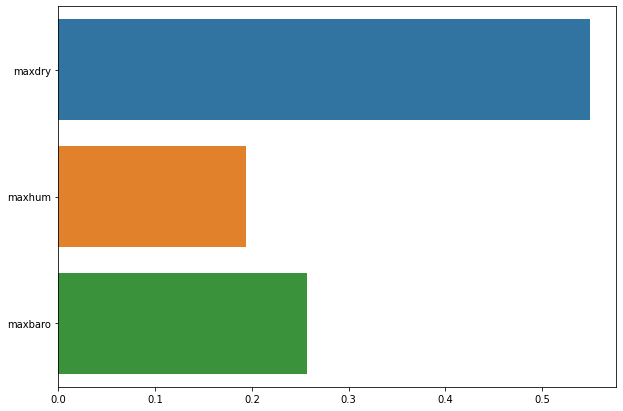

In [22]:
#plot the feature importances
plt.figure(figsize=(10, 7))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.show()

In [23]:
df_lightning = df[df['sferics_10'] == 1]
df_no_lightning = df[df['sferics_10'] == 0]

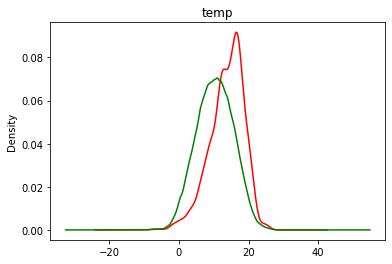

In [24]:
# plotting the density plot 
# for 'max_dry' attribute
# using plot.density()
df_lightning.maxdry.plot.density(color='red')
df_no_lightning.maxdry.plot.density(color='green')
plt.title('temp')
plt.show()

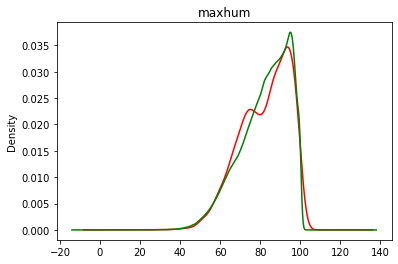

In [25]:
#maxhum
df_lightning.maxhum.plot.density(color='red')
df_no_lightning.maxhum.plot.density(color='green')
plt.title('maxhum')
plt.show()

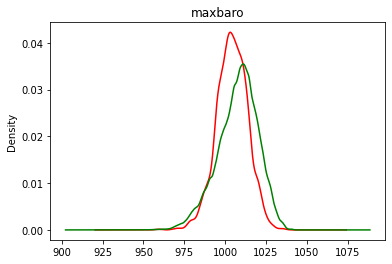

In [26]:
#maxbaro
df_lightning.maxbaro.plot.density(color='red')
df_no_lightning.maxbaro.plot.density(color='green')
plt.title('maxbaro')
plt.show()

In [27]:
#clearly, pdfs of maxdry, maxhum and maxbaro show that the station selected has less difference between the classes than previous studies, XGBoos models are insufficient to predict lightning in this case.

In [32]:
df

,year,month,day,hour,minute,maxdry,maxhum,maxbaro,date,sferics_10,sferics_20,sferics_30
0,2005,1,1,0,0,8.6,85.0,1015.3,20051100,0,0,0
1,2005,1,1,0,10,8.5,88.9,1015.3,200511010,0,0,0
2,2005,1,1,0,20,8.2,89.1,1015.1,200511020,0,0,0
3,2005,1,1,0,30,8.2,88.5,1014.9,200511030,0,0,0
4,2005,1,1,0,40,8.3,86.8,1014.8,200511040,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
999211,2023,12,31,23,10,6.2,83.8,987.9,202312312310,0,0,0
999212,2023,12,31,23,20,6.2,84.1,988.3,202312312320,0,0,0
999213,2023,12,31,23,30,6.2,84.5,988.6,202312312330,0,0,0
999214,2023,12,31,23,40,6.1,85.4,988.8,202312312340,0,0,0


In [33]:
#add a derivative column for maxdry, maxhum and maxbaro
df['maxdry_diff'] = df['maxdry'].diff()
df['maxhum_diff'] = df['maxhum'].diff()
df['maxbaro_diff'] = df['maxbaro'].diff()

#drop the first row
df = df.dropna()
df

,year,month,day,hour,minute,maxdry,maxhum,maxbaro,date,sferics_10,sferics_20,sferics_30,maxdry_diff,maxhum_diff,maxbaro_diff
1,2005,1,1,0,10,8.5,88.9,1015.3,200511010,0,0,0,-0.1,3.9,0.0
2,2005,1,1,0,20,8.2,89.1,1015.1,200511020,0,0,0,-0.3,0.2,-0.2
3,2005,1,1,0,30,8.2,88.5,1014.9,200511030,0,0,0,0.0,-0.6,-0.2
4,2005,1,1,0,40,8.3,86.8,1014.8,200511040,0,0,0,0.1,-1.7,-0.1
5,2005,1,1,0,50,8.5,85.1,1014.7,200511050,0,0,0,0.2,-1.7,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999211,2023,12,31,23,10,6.2,83.8,987.9,202312312310,0,0,0,0.0,-0.2,0.2
999212,2023,12,31,23,20,6.2,84.1,988.3,202312312320,0,0,0,0.0,0.3,0.4
999213,2023,12,31,23,30,6.2,84.5,988.6,202312312330,0,0,0,0.0,0.4,0.3
999214,2023,12,31,23,40,6.1,85.4,988.8,202312312340,0,0,0,-0.1,0.9,0.2


In [34]:
df_lightning = df[df['sferics_10'] == 1]
df_no_lightning = df[df['sferics_10'] == 0]

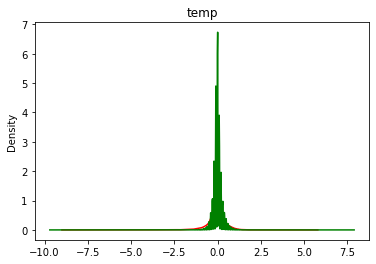

In [35]:
# plotting the density plot 
# for 'max_dry' attribute
# using plot.density()
df_lightning.maxdry_diff.plot.density(color='red')
df_no_lightning.maxdry_diff.plot.density(color='green')
plt.title('temp')
plt.show()

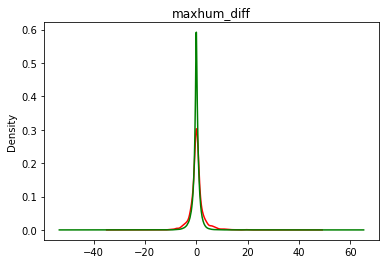

In [36]:
#maxhum_diff
df_lightning.maxhum_diff.plot.density(color='red')
df_no_lightning.maxhum_diff.plot.density(color='green')
plt.title('maxhum_diff')
plt.show()

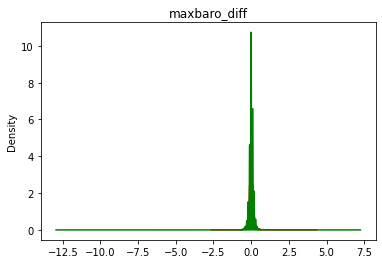

In [37]:
#maxbaro_diff
df_lightning.maxbaro_diff.plot.density(color='red')
df_no_lightning.maxbaro_diff.plot.density(color='green')
plt.title('maxbaro_diff')
plt.show()


In [39]:
#add a persistance column for sferics_10
df['sferics_10_persistance'] = df['sferics_10'].shift()


C:\Users\brand\AppData\Local\Temp\ipykernel_2216\1626940041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sferics_10_persistance'] = df['sferics_10'].shift()


,year,month,day,hour,minute,maxdry,maxhum,maxbaro,date,sferics_10,sferics_20,sferics_30,maxdry_diff,maxhum_diff,maxbaro_diff,sferics_10_persistance
1,2005,1,1,0,10,8.5,88.9,1015.3,200511010,0,0,0,-0.1,3.9,0.0,NaN
2,2005,1,1,0,20,8.2,89.1,1015.1,200511020,0,0,0,-0.3,0.2,-0.2,0.0
3,2005,1,1,0,30,8.2,88.5,1014.9,200511030,0,0,0,0.0,-0.6,-0.2,0.0
4,2005,1,1,0,40,8.3,86.8,1014.8,200511040,0,0,0,0.1,-1.7,-0.1,0.0
5,2005,1,1,0,50,8.5,85.1,1014.7,200511050,0,0,0,0.2,-1.7,-0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999211,2023,12,31,23,10,6.2,83.8,987.9,202312312310,0,0,0,0.0,-0.2,0.2,0.0
999212,2023,12,31,23,20,6.2,84.1,988.3,202312312320,0,0,0,0.0,0.3,0.4,0.0
999213,2023,12,31,23,30,6.2,84.5,988.6,202312312330,0,0,0,0.0,0.4,0.3,0.0
999214,2023,12,31,23,40,6.1,85.4,988.8,202312312340,0,0,0,-0.1,0.9,0.2,0.0


In [41]:
df = df.dropna()
df

,year,month,day,hour,minute,maxdry,maxhum,maxbaro,date,sferics_10,sferics_20,sferics_30,maxdry_diff,maxhum_diff,maxbaro_diff,sferics_10_persistance
2,2005,1,1,0,20,8.2,89.1,1015.1,200511020,0,0,0,-0.3,0.2,-0.2,0.0
3,2005,1,1,0,30,8.2,88.5,1014.9,200511030,0,0,0,0.0,-0.6,-0.2,0.0
4,2005,1,1,0,40,8.3,86.8,1014.8,200511040,0,0,0,0.1,-1.7,-0.1,0.0
5,2005,1,1,0,50,8.5,85.1,1014.7,200511050,0,0,0,0.2,-1.7,-0.1,0.0
6,2005,1,1,1,0,8.6,84.2,1014.7,20051110,0,0,0,0.1,-0.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999211,2023,12,31,23,10,6.2,83.8,987.9,202312312310,0,0,0,0.0,-0.2,0.2,0.0
999212,2023,12,31,23,20,6.2,84.1,988.3,202312312320,0,0,0,0.0,0.3,0.4,0.0
999213,2023,12,31,23,30,6.2,84.5,988.6,202312312330,0,0,0,0.0,0.4,0.3,0.0
999214,2023,12,31,23,40,6.1,85.4,988.8,202312312340,0,0,0,-0.1,0.9,0.2,0.0


In [43]:
#oversample and oversample
X = df.drop(['sferics_10', 'sferics_20', 'sferics_30'], axis=1)
y = df['sferics_10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train, y_train = rus.fit_resample(X_train, y_train)
#instantiate the model
model = XGBRegressor()

#fit the model
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)
#if y_pred>0.6, then y_pred=1, else y_pred=0
y_pred = np.where(y_pred > 0.6, 1, 0)

#calculate the f-score
from sklearn.metrics import f1_score
print('F1 Score: ', f1_score(y_test, y_pred))


tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
tn = np.sum(np.logical_and(y_pred == 0, y_test == 0))
fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))
print('True Positives: ', tp)
print('False Positives: ', fp)
print('True Negatives: ', tn)
print('False Negatives: ', fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Precision: ', precision)
print('Recall: ', recall)

#POD, probability of detection
pod = tp / (tp + fn)
print('POD: ', pod)

#FAR, false alarm ratio
far = fp / (fp + tp)
print('FAR: ', far)

#CSI, critical success index
csi = tp / (tp + fn + fp)
print('CSI: ', csi)

#plot the feature importances
plt.figure(figsize=(10, 7))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.show()


F1 Score:  0.28186528497409324
True Positives:  136
False Positives:  218
True Negatives:  198851
False Negatives:  475
Precision:  0.384180790960452
Recall:  0.2225859247135843
POD:  0.2225859247135843
FAR:  0.615819209039548
CSI:  0.1640530759951749


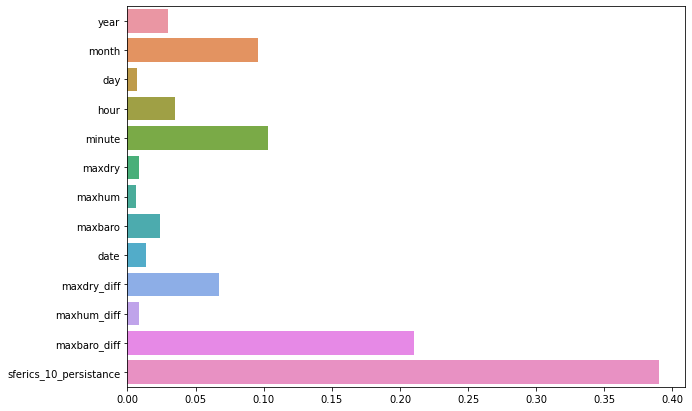

In [44]:
#plot the feature importances
plt.figure(figsize=(10, 7))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.show()


In [45]:
#if sferics_10_persistance is 1, then y_pred=1, else y_pred=0
y_pred = X_test['sferics_10_persistance']
y_pred


192169    0.0
738126    0.0
986074    0.0
468029    0.0
964407    0.0
         ... 
116386    0.0
669981    0.0
881717    0.0
983787    0.0
584219    0.0
Name: sferics_10_persistance, Length: 199680, dtype: float64

In [46]:

#calculate the f-score
from sklearn.metrics import f1_score
print('F1 Score: ', f1_score(y_test, y_pred))


tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
tn = np.sum(np.logical_and(y_pred == 0, y_test == 0))
fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))
print('True Positives: ', tp)
print('False Positives: ', fp)
print('True Negatives: ', tn)
print('False Negatives: ', fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Precision: ', precision)
print('Recall: ', recall)

#POD, probability of detection
pod = tp / (tp + fn)
print('POD: ', pod)

#FAR, false alarm ratio
far = fp / (fp + tp)
print('FAR: ', far)

#CSI, critical success index
csi = tp / (tp + fn + fp)
print('CSI: ', csi)


F1 Score:  0.2947729220222794
True Positives:  172
False Positives:  384
True Negatives:  198685
False Negatives:  439
Precision:  0.30935251798561153
Recall:  0.281505728314239
POD:  0.281505728314239
FAR:  0.6906474820143885
CSI:  0.1728643216080402


In [ ]:
#persistance model outperforms the XGBoost model

F1 Score:  0.15736766809728184
True Positives:  55
False Positives:  33
True Negatives:  199036
False Negatives:  556
Precision:  0.625
Recall:  0.09001636661211129
POD:  0.09001636661211129
FAR:  0.375
CSI:  0.08540372670807453


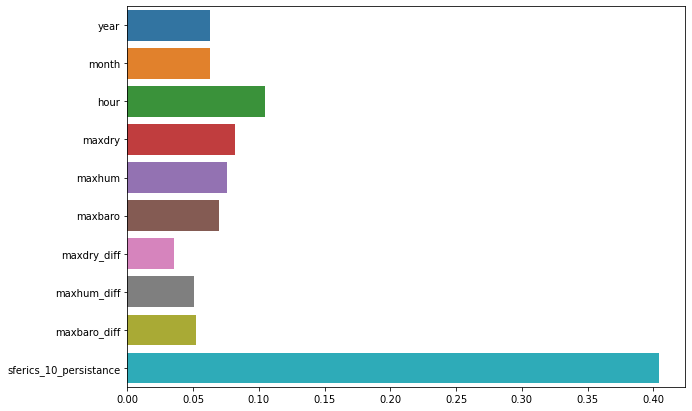

In [48]:
#oversample and oversample
X = df.drop(['minute', 'date', 'day', 'sferics_10', 'sferics_20', 'sferics_30'], axis=1)
y = df['sferics_10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train, y_train = rus.fit_resample(X_train, y_train)
#instantiate the model
model = XGBRegressor()

#fit the model
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)
#if y_pred>0.6, then y_pred=1, else y_pred=0
y_pred = np.where(y_pred > 0.6, 1, 0)

#calculate the f-score
from sklearn.metrics import f1_score
print('F1 Score: ', f1_score(y_test, y_pred))


tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
tn = np.sum(np.logical_and(y_pred == 0, y_test == 0))
fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))
print('True Positives: ', tp)
print('False Positives: ', fp)
print('True Negatives: ', tn)
print('False Negatives: ', fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('Precision: ', precision)
print('Recall: ', recall)

#POD, probability of detection
pod = tp / (tp + fn)
print('POD: ', pod)

#FAR, false alarm ratio
far = fp / (fp + tp)
print('FAR: ', far)

#CSI, critical success index
csi = tp / (tp + fn + fp)
print('CSI: ', csi)

#plot the feature importances
plt.figure(figsize=(10, 7))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.show()